# Regressione vs Classificazione: Fondamenti di Machine Learning
**Professore:** Gemini AI

In questo laboratorio confronteremo i due pilastri dell'apprendimento supervisionato:
1. **Regressione:** L'output è un numero reale (es. il prezzo di una casa).
2. **Classificazione:** L'output è un'etichetta o una classe (es. 'Email Spam' o 'Email Non Spam').

--- 
## 1. Modello di Regressione
### Teoria
La regressione cerca di mappare l'input verso un valore continuo. L'obiettivo è trovare una funzione (spesso una retta in 2D) che minimizzi la distanza tra i punti osservati e la funzione stessa.

**Esempio:** Predire il guadagno in base agli anni di esperienza.

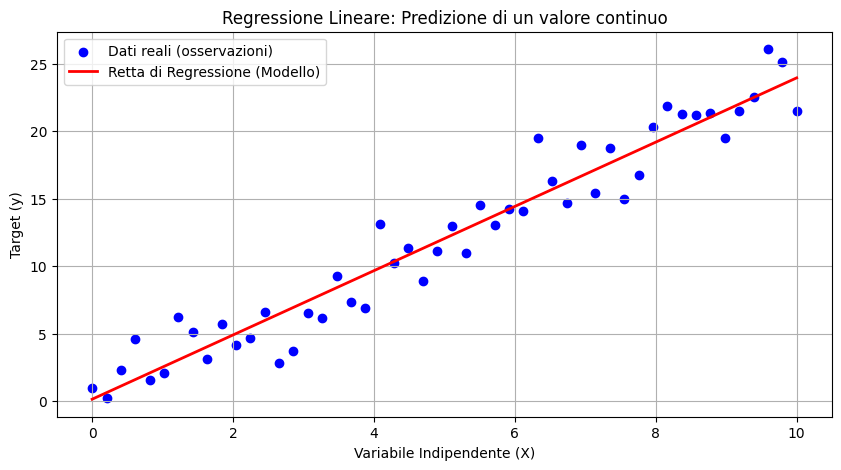

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generazione dati sintetici (Relazione Lineare + Rumore)
np.random.seed(42)
X_reg = np.linspace(0, 10, 50).reshape(-1, 1)
y_reg = 2.5 * X_reg + np.random.normal(0, 2, size=(50, 1))

# Creazione e addestramento del modello
model_reg = LinearRegression()
model_reg.fit(X_reg, y_reg)
y_pred = model_reg.predict(X_reg)

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.scatter(X_reg, y_reg, color='blue', label='Dati reali (osservazioni)')
plt.plot(X_reg, y_pred, color='red', linewidth=2, label='Retta di Regressione (Modello)')
plt.title("Regressione Lineare: Predizione di un valore continuo")
plt.xlabel("Variabile Indipendente (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

--- 
## 2. Modello di Classificazione
### Teoria
Nella classificazione, l'algoritmo impara a tracciare un confine (decision boundary) che separa diverse classi di dati. L'output non è un numero, ma l'appartenenza a un gruppo.

**Esempio:** Capire se un tumore è maligno o benigno in base alla dimensione.

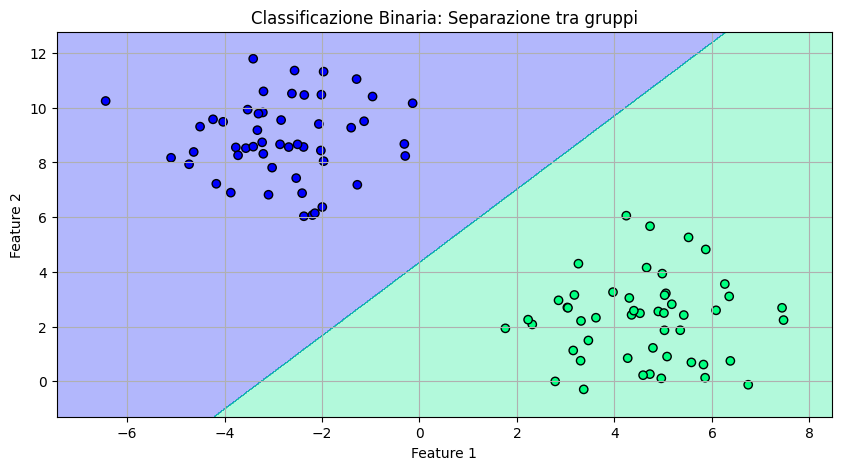

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Generazione dati sintetici (Due gruppi distinti)
X_clf, y_clf = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42, cluster_std=1.5)

# Addestramento modello di Classificazione (Logistic Regression)
model_clf = LogisticRegression()
model_clf.fit(X_clf, y_clf)

# Creazione di una mesh per disegnare il confine di decisione
h = .02
x_min, x_max = X_clf[:, 0].min() - 1, X_clf[:, 0].max() + 1
y_min, y_max = X_clf[:, 1].min() - 1, X_clf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizzazione
plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='winter')
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, edgecolors='k', cmap='winter', label='Classi')
plt.title("Classificazione Binaria: Separazione tra gruppi")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

### Conclusione
- La **Regressione** ha prodotto una linea che attraversa i punti per stimare valori intermedi.
- La **Classificazione** ha prodotto aree colorate (confini) per decidere a quale categoria appartiene un nuovo punto.